In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
train=pd.read_csv('train.csv', encoding='utf-8')
test =pd.read_csv('test.csv', encoding='utf-8')
test_org=test['id']

In [3]:
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

missing_data1 = train.isnull().sum()
missing_data2 = test.isnull().sum()

print("Missing values in each feature in training data:\n", missing_data1)
print("Missing values in each feature in training data:\n", missing_data2)


Missing values in each feature in training data:
 age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64
Missing values in each feature in training data:
 age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride

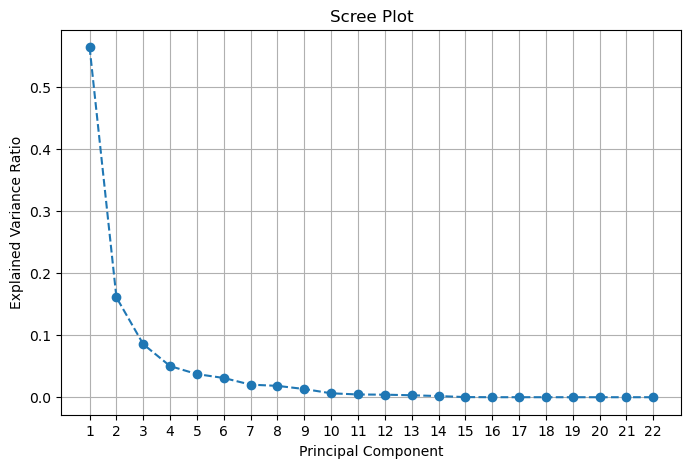

Explained variance ratio for selected components: [0.56364422 0.16071986 0.08536298 0.0501141  0.03725066]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X= train.drop(columns=['smoking'])
y = train['smoking']

#scaler_X = StandardScaler()
#X = scaler_X.fit_transform(X)


# Apply PCA to see variance explained
pca = PCA()
pca.fit(X)

# Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Decide number of components (example: 2)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Explained variance ratio for selected components
print(f"Explained variance ratio for selected components: {pca.explained_variance_ratio_}")

# Train-test split and SVM (continue as before)


In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the PCA-transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train a KNN classifier
k = 4  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 72.53%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      1909
         1.0       0.67      0.49      0.56      1091

    accuracy                           0.73      3000
   macro avg       0.71      0.67      0.68      3000
weighted avg       0.72      0.73      0.71      3000



In [6]:
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,50.0,160.0,65.0,87.5,1.0,1.0,1.0,1.0,110.0,70.0,...,92.0,60.0,114.0,13.4,1.0,0.7,27.0,22.0,14.0,0.0
1,35.0,165.0,65.0,82.2,0.7,1.0,1.0,1.0,112.0,74.0,...,144.0,40.0,155.0,14.9,1.0,1.2,24.0,20.0,44.0,0.0
2,60.0,160.0,65.0,91.0,0.8,1.0,1.0,1.0,120.0,70.0,...,116.0,45.0,115.0,13.4,1.0,0.7,32.0,37.0,36.0,0.0
3,30.0,180.0,75.0,82.0,1.0,0.9,1.0,1.0,138.0,88.0,...,68.0,77.0,98.0,17.0,1.0,0.9,24.0,19.0,13.0,0.0
4,65.0,155.0,55.0,83.0,0.7,0.8,1.0,1.0,107.0,71.0,...,132.0,40.0,115.0,14.8,1.0,0.7,25.0,22.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40.0,170.0,65.0,84.0,1.0,1.2,1.0,1.0,110.0,74.0,...,120.0,49.0,141.0,16.0,1.0,0.9,23.0,25.0,59.0,0.0
9996,55.0,170.0,65.0,77.0,1.0,1.0,1.0,1.0,118.0,71.0,...,107.0,55.0,102.0,14.6,1.0,1.2,22.0,25.0,21.0,0.0
9997,35.0,175.0,75.0,90.0,1.2,1.0,1.0,1.0,138.0,82.0,...,63.0,46.0,104.0,14.9,2.0,0.9,23.0,24.0,23.0,0.0
9998,40.0,155.0,60.0,81.0,0.8,0.9,1.0,1.0,130.0,80.0,...,84.0,77.0,92.0,12.1,1.0,0.7,23.0,19.0,14.0,1.0


In [7]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df1 is your original DataFrame with 'smoking' as the target variable
# and train is the DataFrame used for training the KNN model

# Step 1: Align the columns of the test set with the training set
X1_test = test  # Replace 'test' with the actual test DataFrame variable name
X1_test = X1_test[(train.drop(columns=['smoking'])).columns]  # Ensure same feature columns in both training and test set

# Step 2: Apply PCA to the test set
X1_test_pca = pca.transform(X1_test)  # Use transform, not fit, on the test set

# Step 3: Make predictions using the trained KNN model
test_predictions_scaled = knn.predict(X1_test_pca)


In [8]:

# Step 4: Save predictions to a CSV file
# Replace 'test['id']' with the actual test DataFrame's id column in predictions
predictions_df = pd.DataFrame({
    'id': test_org,  # Use the 'id' column from the test DataFrame
    'smoking': test_predictions_scaled.flatten()
})

# Save predictions to a CSV file
predictions_df.to_csv('knn_predictions.csv', index=False)

print("Predictions saved to 'knn_predictions.csv' successfully!")

Predictions saved to 'knn_predictions.csv' successfully!


In [9]:
X_pca

array([[ 25.53312643,   5.49874785, -15.0947833 ,  16.16147682,
         -0.61873064],
       [195.57003427, -29.54010689,  -7.26399078,  19.24691911,
         -1.61666482],
       [103.07517586,  50.52320287, -15.70321735,   4.87198726,
          5.65399084],
       ...,
       [-41.11267519, -20.46885653, -15.41459759,  12.29253147,
        -16.80358874],
       [-24.90547458, -36.86642407,   0.40465383,  25.34141238,
         -4.39456506],
       [-47.60952915, -41.49420215,   7.03900099, -14.04004694,
          8.22375978]])